In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']

from ipywidgets import interact
import ipywidgets as widgets

In [2]:
plt.rcdefaults()
plt.rcParams.update({'figure.dpi':100})
#plt.rcParams.update({'figure.autolayout':'True'})
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'mathtext.default':'regular'})
plt.rcParams.update({'mathtext.fontset':'stixsans'})
plt.rcParams.update({'axes.linewidth': 1.5})
plt.rcParams.update({'xtick.major.width': 1.25 })
plt.rcParams.update({'xtick.minor.size': 2.5})
plt.rcParams.update({'xtick.minor.width': 1.25 })
plt.rcParams.update({'ytick.major.size': 5})
plt.rcParams.update({'ytick.major.width': 1.25 })
plt.rcParams.update({'ytick.minor.size': 2.5})
plt.rcParams.update({'ytick.minor.width': 1.25 })
plt.rc('legend',**{'fontsize':'x-small'})
#plt.figure(1,figsize = [11.0, 8.5])
plt.rcParams.update({'xtick.direction':'in'})
plt.rcParams.update({'ytick.direction':'in'})
plt.rcParams.update({'xtick.top':'True'})
plt.rcParams.update({'ytick.right':'True'})
#plt.rcParams.update({'axes.formatter.limits': (-2, 2)})
plt.rcParams.update({'lines.markersize': 8}) #6 is the default
plt.rcParams.update({'legend.framealpha': 1.0})
plt.rcParams.update({'legend.fancybox': 'False'})
#plt.rcParams.update({'axes.grid':'True'})

In [3]:
# Global variables
Percentages = [0.6827, 0.9545]

def get_levels(loglike):
    ds = np.sort(np.exp(-0.5*loglike).flatten())[::-1]
    cs = np.cumsum(ds)
    cs /= cs[-1]
    return np.array([ds[np.argmax(cs > l)] for l in Percentages])[::-1]

In [99]:
alpha = 2
betay = 0
gammax = 0
gammay = 1.5
const = 0

@interact(betax= widgets.FloatSlider(min=-5, max=5), 
          theta= widgets.FloatSlider(min=-np.pi/2, max=np.pi/2))

def plot_like(betax, theta):
    xyrange = (-10,10)
    x_base, y_base = np.meshgrid(*2*[np.linspace(*xyrange, 1000)])
    
    x = x_base*np.cos(theta) + y_base*np.sin(theta)
    y = -x_base*np.sin(theta) + y_base*np.cos(theta)

    loglike = x**2 + y**2 + np.exp(alpha)*(betax*x**2 + betay*y**2 - gammax*x - gammay*y + const)**2

    plt.gca().set_aspect(1)
    plt.contour(np.exp(-0.5*loglike), extent=2*xyrange, levels=get_levels(loglike))
    plt.xlim((-3,3))
    plt.ylim((-3,3))

interactive(children=(FloatSlider(value=0.0, description='betax', max=5.0, min=-5.0), FloatSlider(value=0.0, d…

In [236]:
alpha = 2
betay = 0
gammax = 0
gammay = 1.5
const = 0

betax = 0.4
theta = 0.2

xyrange = (-10,10)
x_base, y_base = np.meshgrid(*2*[np.linspace(*xyrange, 1001)])
    
x = x_base*np.cos(theta) + y_base*np.sin(theta)
y = -x_base*np.sin(theta) + y_base*np.cos(theta)

loglike = x**2 + y**2 + np.exp(alpha)*(betax*x**2 + betay*y**2 - gammax*x - gammay*y + const)**2


In [237]:
L = np.exp(-0.5*loglike)

In [238]:
L[x_base<0]=0

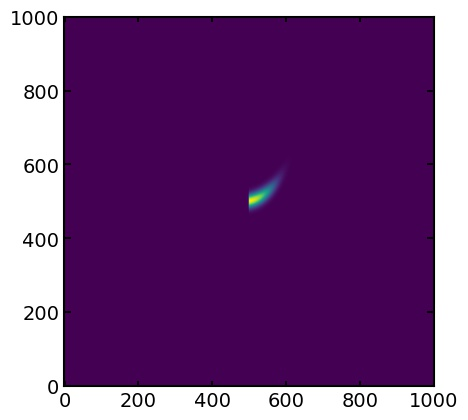

In [239]:
plt.imshow(L, origin='lower')

In [240]:
L_all = np.exp(-0.5*loglike)

In [241]:
def normalize(l, x):
    raw_sum = np.trapz(l, x)
    return l/raw_sum

# marginalize over param y for axis = 0,
#                        x for axis = 1
# a denotes x or y
def marginalize(L, a, axis):
    l_axis = np.sum(L, axis=axis)
    l_normed = normalize(l_axis, a)
    return l_normed

# maximize over param y
def maximize(L, x, y, mean_y):
    pos = np.where(y==mean_y)[0][0]
    l = L[pos]
    return normalize(l, x)

In [242]:
L_num_marg = marginalize(L, y_base.T[0], 0)
L_num_marg_all = marginalize(L_all, y_base.T[0], 0)

In [243]:
ratio = np.max(L_num_marg)/np.max(L_num_marg_all)

In [253]:
DL = []
DDL = []
def get_tk_marg(loglike, y, Y):
    dL = np.gradient(loglike, y, axis=0, edge_order=2)
    DL.append(dL)
    ddL = np.gradient(dL, y, axis=0, edge_order=2)
    DDL.append(ddL)

    L_marg = loglike - 0.5*dL*(1/ddL)*dL + np.log(0.5*ddL)
    return np.exp(-0.5*L_marg)[Y==0]

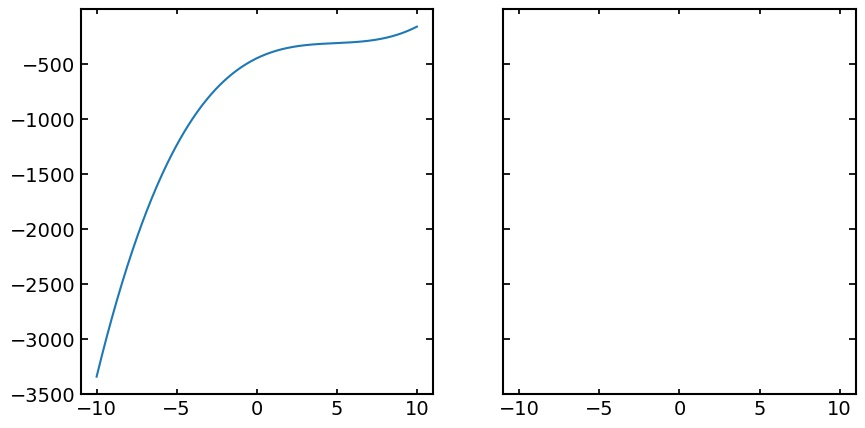

In [261]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
ax[0].plot(x_base[0], DL[0][0])

In [245]:
loglike_op = loglike.copy()

In [246]:
loglike_op[x_base<0]=1000

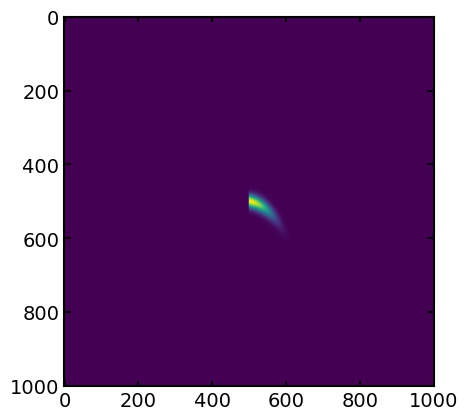

In [247]:
plt.imshow(np.exp(-0.5*loglike_op))

In [258]:
L_tk_marg = get_tk_marg(loglike, y_base.T[0], y_base)
#L_tk_marg_op = get_tk_marg(loglike_op, y_base.T[0], y_base)

In [249]:
L_tk_marg_OP = np.nan_to_num(L_tk_marg_op)

In [250]:
ratio_tk = np.max(L_tk_marg_OP)/np.max(L_tk_marg)

In [251]:
max_val = 0.5
def norm_to_max(l):
    return (l/np.max(l))*max_val

Text(0.5, 0, 'x')

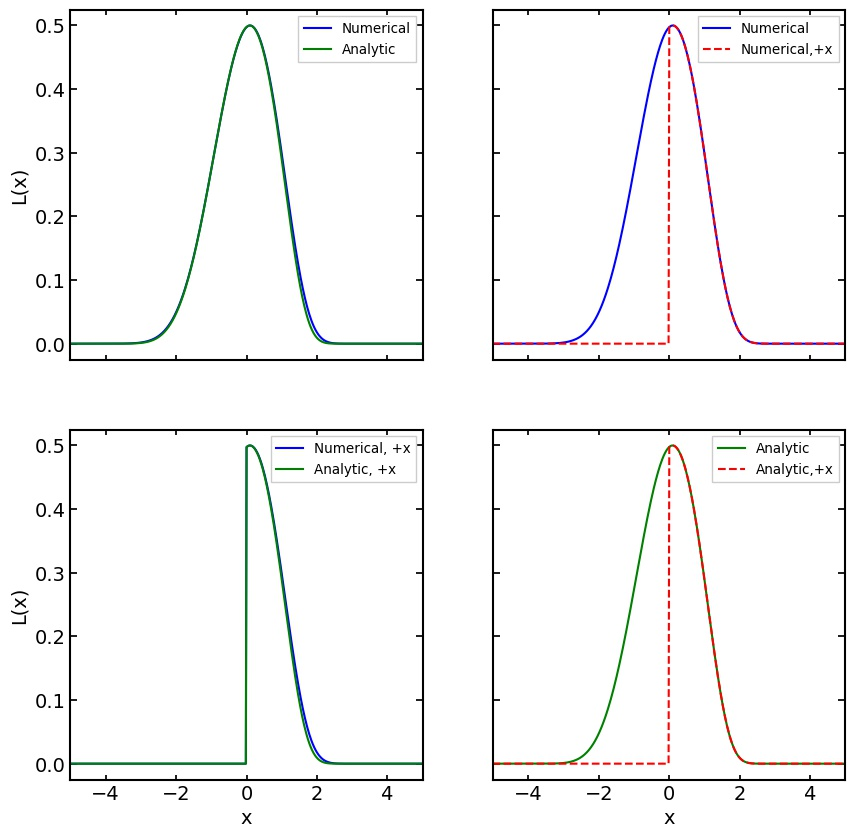

In [252]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,10))

ax[0][0].plot(x_base[0], norm_to_max(L_num_marg_all), 'b', label='Numerical')
ax[0][0].plot(x_base[0], norm_to_max(L_tk_marg), 'g', label='Analytic')
ax[0][0].legend()
#ax[0][0].set_xlabel('x')
ax[0][0].set_ylabel('L(x)')
ax[0][0].set_xlim((-5, 5))

ax[0][1].plot(x_base[0], norm_to_max(L_num_marg_all), 'b', label='Numerical')
ax[0][1].plot(x_base[0], norm_to_max(L_num_marg), 'r--', label='Numerical,+x')
#ax[0][1].plot(x_base[0], L_num_marg/np.max(L_num_marg)*norm_to_max(L_num_marg_all)[500], 'r--', label='Numerical, +x')
ax[0][1].legend()
#ax[0][1].set_xlabel('x')
#ax[0][1].set_ylabel('L(x)')

ax[1][0].plot(x_base[0], norm_to_max(L_num_marg), 'b', label='Numerical, +x')
ax[1][0].plot(x_base[0], norm_to_max(L_tk_marg_OP), 'g', label='Analytic, +x')
ax[1][0].legend()
ax[1][0].set_xlabel('x')
ax[1][0].set_ylabel('L(x)')

ax[1][1].plot(x_base[0], norm_to_max(L_tk_marg), 'g', label='Analytic')
ax[1][1].plot(x_base[0], norm_to_max(L_tk_marg_OP), 'r--', label='Analytic,+x')
#ax[1][1].plot(x_base[0], L_tk_marg_OP/np.max(L_tk_marg_OP)*norm_to_max(L_tk_marg)[500], 'r--', label='Analytic, +x')
ax[1][1].legend()
ax[1][1].set_xlabel('x')